# Rejection Sampling

We want to draw uniform samples from a triangular distribution by using a normal distribution proposal.

In [73]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
# define p(x), q(x) and other parameters
M = 1.2
sigma = 0.45

def p(x):
    y = np.where(x<0, x+1, 1-x)
    y[np.abs(x)>1] = 0
    return(y)

def make_q(mu, sigma):
    return lambda x: 1/(sigma * np.sqrt(2*np.pi)) * np.exp( - 0.5 * (x - mu)**2 / sigma**2)

q = make_q(0, sigma)

Plot both $p(x)$ and $Mq(x)$ to visually confirm that $Mq(x) \geq p(x)$ for all values of $x$ of interest.

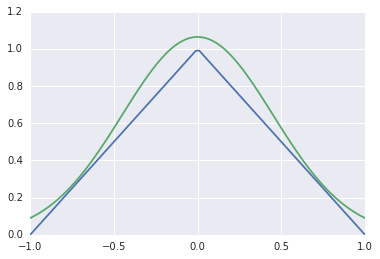

In [75]:
x = np.linspace(-1,1,100)

plt.plot(x, p(x))
plt.plot(x, M*q(x))
plt.show()

## Apply rejection sampling

Having defined our functions $p(x)$ and $q(x)$, we can apply *rejection sampling* to draw samples from the target distribution.

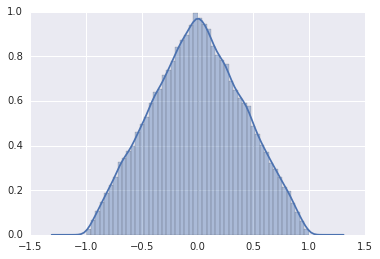

In [76]:
N = int(1e5)
x = np.random.normal(0, sigma, N)
alpha = p(x) / (M*q(x))
accepted = np.random.rand(N) < alpha

sns.distplot(x[accepted]);

## Acceptance Rate

In [77]:
len(x[accepted]) / N

0.83314